In [1]:
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize' : (10, 7), 'figure.dpi' : 120 })

In [14]:
file_path='C:/data/time_series.csv'
df = pd.read_csv(file_path)

In [4]:
print(df)

         Date  Close  Start   High    Low  Volume
0  2015-07-02  10100  10850  10900  10000  137977
1  2016-06-29  10700  10550  10900   9990  170253
2  2017-06-28  10400  10900  10950  10150  155769
3  2018-06-27  10900  10800  11050  10500  133548
4  2019-06-26  10800  10900  11000  10700   63039


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    5 non-null      object
 1   Close   5 non-null      int64 
 2   Start   5 non-null      int64 
 3   High    5 non-null      int64 
 4   Low     5 non-null      int64 
 5   Volume  5 non-null      int64 
dtypes: int64(5), object(1)
memory usage: 368.0+ bytes


In [8]:
df['new_date'] = pd.to_datetime(df['Date'])
print(df.head())
print('\n')
print(df.info())

         Date  Close  Start   High    Low  Volume   new_date
0  2015-07-02  10100  10850  10900  10000  137977 2015-07-02
1  2016-06-29  10700  10550  10900   9990  170253 2016-06-29
2  2017-06-28  10400  10900  10950  10150  155769 2017-06-28
3  2018-06-27  10900  10800  11050  10500  133548 2018-06-27
4  2019-06-26  10800  10900  11000  10700   63039 2019-06-26


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      5 non-null      object        
 1   Close     5 non-null      int64         
 2   Start     5 non-null      int64         
 3   High      5 non-null      int64         
 4   Low       5 non-null      int64         
 5   Volume    5 non-null      int64         
 6   new_date  5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 408.0+ bytes
None


In [10]:
df.drop('Date', axis=1, inplace = True)
df.set_index('new_date', inplace = True)
print(df.head())

            Close  Start   High    Low  Volume
new_date                                      
2015-07-02  10100  10850  10900  10000  137977
2016-06-29  10700  10550  10900   9990  170253
2017-06-28  10400  10900  10950  10150  155769
2018-06-27  10900  10800  11050  10500  133548
2019-06-26  10800  10900  11000  10700   63039


In [11]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color="tab:red")
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

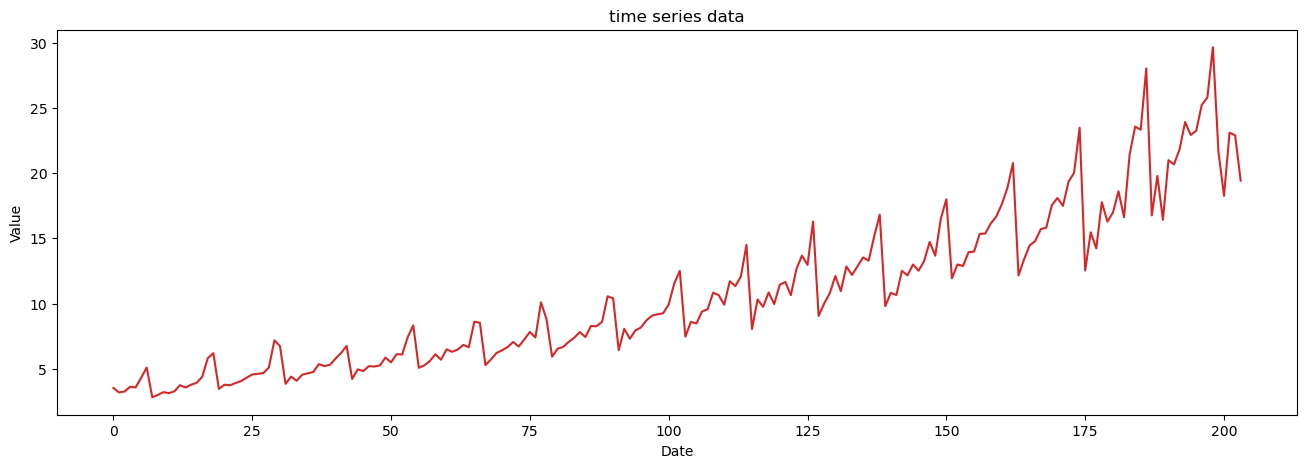

In [15]:
plot_df(df,x=df.index, y=df.value, title="time series data")

In [17]:
df = pd.read_csv('c:/data/time_series.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

In [18]:
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

In [19]:
np.random.seed(10)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)


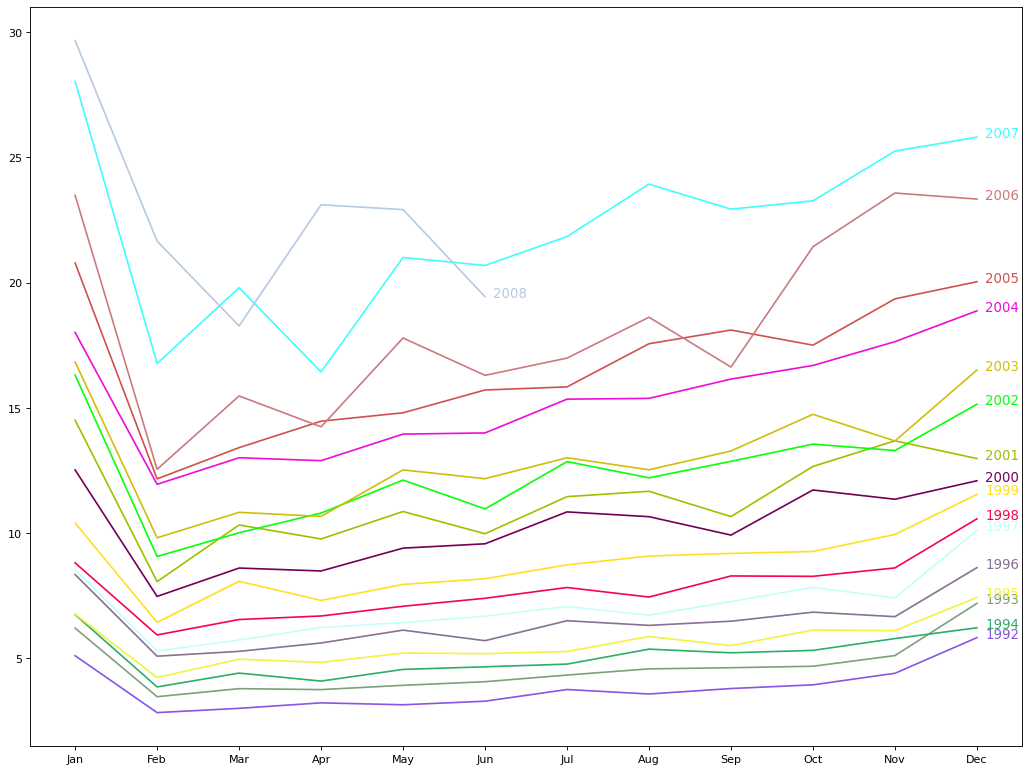

In [21]:
plt.figure(figsize=(16,12), dpi = 80)
for i, y in enumerate(years):
    if i > 0:
        plt.plot('month', 'value', data=df.loc[df.year==y, :],
                color = mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year == y, 'value']
                [-1:].values[0], y, fontsize=12, color=mycolors[i])

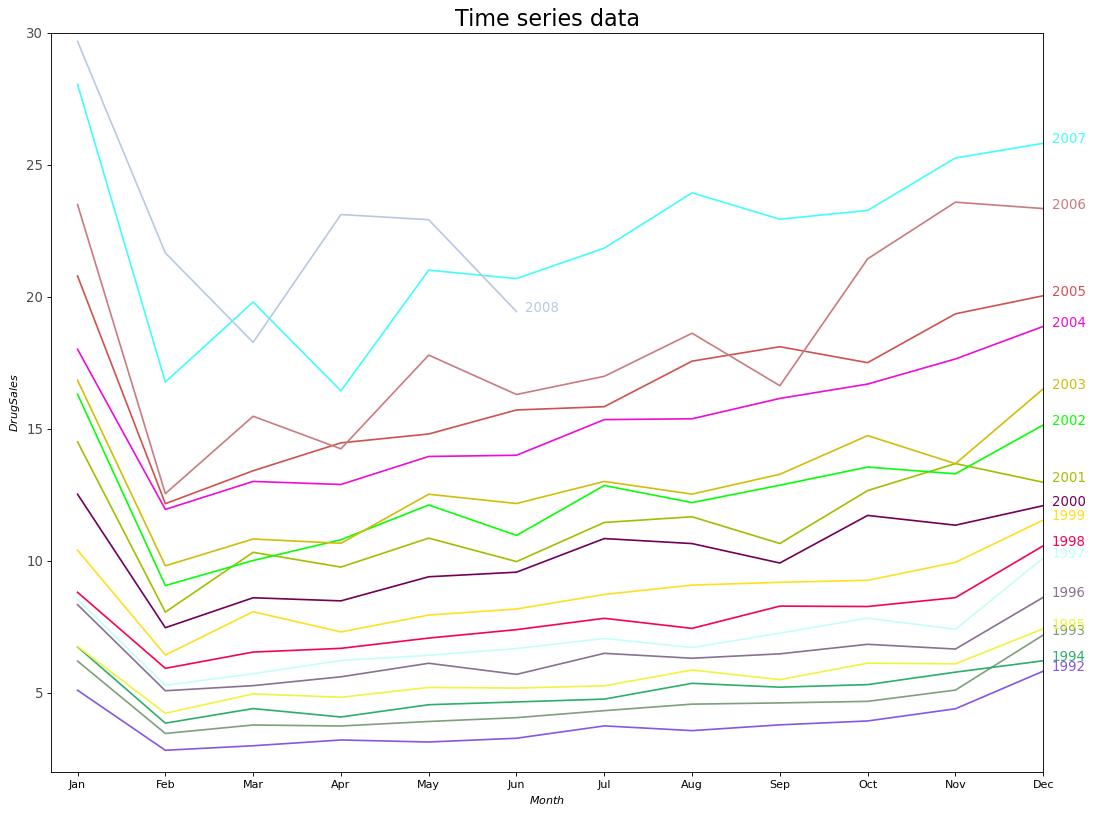

In [28]:
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Time series data", fontsize=20)
plt.show()

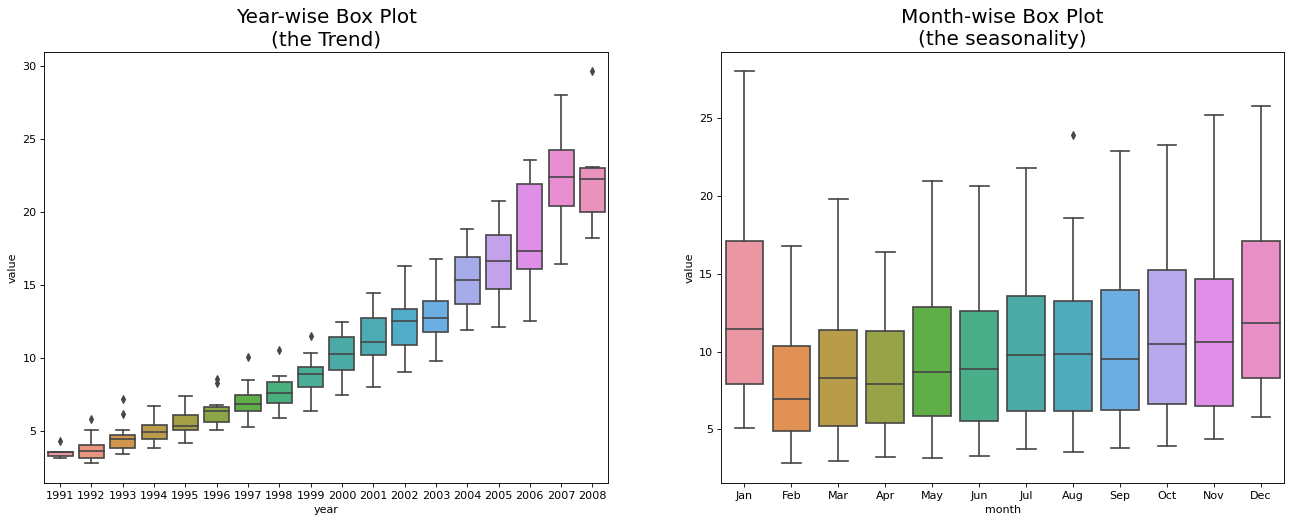

In [30]:
df = pd.read_csv('c:/data/time_series.csv', parse_dates=['date'],
                index_col = 'date')
df.reset_index(inplace=True)
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])
axes[0].set_title('Year-wise Box Plot\n(the Trend)', fontsize=18)
axes[1].set_title('Month-wise Box Plot\n(the seasonality)', fontsize=18)
plt.show()